In [4]:
import pandas as pd
import seaborn as sns

In [6]:
#tips 데이터셋 로드

tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


1. 컬럼의 이름 변경 -> [총금액, 팁, 성별, 흡연여부, 요일, 시간, 인원]
2. 총금액, 팁 컬럼의 데이터를 소수점 한자리만 두고 반올림
3. 식사 인원과 성별에 따른(그룹화) 팁의 비율의 평균 값을 구하고 그래프 시각화(바그래프)

In [11]:
tips.columns = ['총금액', '팁', '성별', '흡연여부', '요일', '시간', '인원']
tips.head()

,총금액,팁,성별,흡연여부,요일,시간,인원
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [17]:
tips[['총금액','팁']] = round(tips[['총금액','팁']], 1)

In [20]:
tips

,총금액,팁,성별,흡연여부,요일,시간,인원
0,17.0,1.0,Female,No,Sun,Dinner,2
1,10.3,1.7,Male,No,Sun,Dinner,3
2,21.0,3.5,Male,No,Sun,Dinner,3
3,23.7,3.3,Male,No,Sun,Dinner,2
4,24.6,3.6,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.0,5.9,Male,No,Sat,Dinner,3
240,27.2,2.0,Female,Yes,Sat,Dinner,2
241,22.7,2.0,Male,Yes,Sat,Dinner,2
242,17.8,1.8,Male,No,Sat,Dinner,2


In [35]:
tips['팁비율'] = tips['팁'] / tips['총금액'] * 100
tips

,총금액,팁,성별,흡연여부,요일,시간,인원,팁비율
0,17.0,1.0,Female,No,Sun,Dinner,2,5.882353
1,10.3,1.7,Male,No,Sun,Dinner,3,16.504854
2,21.0,3.5,Male,No,Sun,Dinner,3,16.666667
3,23.7,3.3,Male,No,Sun,Dinner,2,13.924051
4,24.6,3.6,Female,No,Sun,Dinner,4,14.634146
...,...,...,...,...,...,...,...,...
239,29.0,5.9,Male,No,Sat,Dinner,3,20.344828
240,27.2,2.0,Female,Yes,Sat,Dinner,2,7.352941
241,22.7,2.0,Male,Yes,Sat,Dinner,2,8.810573
242,17.8,1.8,Male,No,Sat,Dinner,2,10.112360


In [36]:
tiprate_mean = tips[['인원','성별','팁비율']].groupby(['인원','성별']).mean()

In [33]:
import matplotlib.pyplot as plt
import platform

if platform.system() == 'Darwin' : # MAC인 경우
    plt.rc('font', family = 'AppleGothic')
else:
    plt.rc('font', family = 'Malgun Gothic')

In [62]:
tiprate_mean.index

MultiIndex([(1,   'Male'),
            (1, 'Female'),
            (2,   'Male'),
            (2, 'Female'),
            (3,   'Male'),
            (3, 'Female'),
            (4,   'Male'),
            (4, 'Female'),
            (5,   'Male'),
            (5, 'Female'),
            (6,   'Male'),
            (6, 'Female')],
           names=['인원', '성별'])

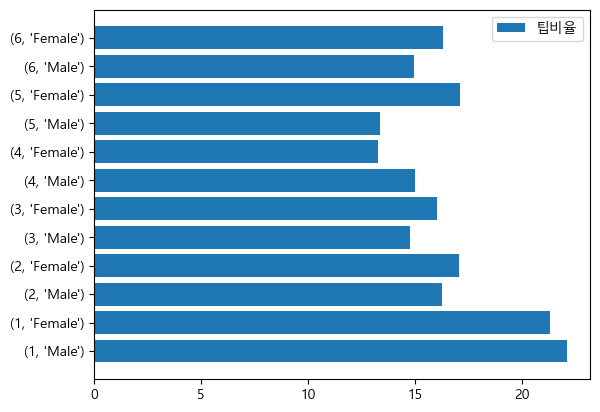

In [43]:
x = list(range(0,len(tiprate_mean.index),1))
y = tiprate_mean['팁비율']


# print(x)
# print(y)

plt.barh(x, y, label = '팁비율')
plt.yticks(x, tiprate_mean.index)
plt.legend()
plt.show()

In [86]:
# 남자의 데이터프레임 구분
# 여자의 데이터프레임 구분

male_data = pd.DataFrame()
female_data = pd.DataFrame()

for i in tiprate_mean.index:
    if i[1] == "Male":
        male_data = pd.concat([male_data, tiprate_mean.loc[[i]]])
    else:
        female_data = pd.concat([female_data, tiprate_mean.loc[[i]]])
    



In [67]:
tiprate_mean.loc[[(1, 'Female')]]

,,팁비율
인원,성별,
1,Female,21.322912


In [87]:
female_data

,,팁비율
인원,성별,
1,Female,21.322912
2,Female,17.053626
3,Female,16.025679
4,Female,13.267871
5,Female,17.114094
6,Female,16.306239


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (0,) and arg 1 with shape (6,).

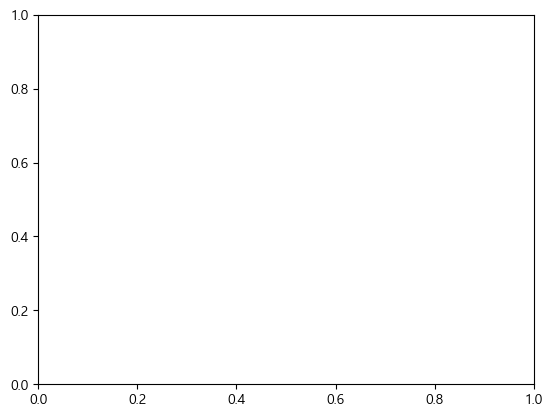

In [88]:
x = list(range(len(male_data)*2,2))
y = male_data['팁비율']

x2 = list(range(len(female_data)*2,2))
y2 = female_data['팁비율']

plt.bar(x,y, width = 0.4)
plt.bar(x2,y2, width = 0.4)
plt.show()

### pivot_table

1. 그룹화
2. 인덱스, 컬럼 기준으로 그룹화
3. 

In [83]:

pivot_data = pd.pivot_table(
    tips,
    index = '인원',
    columns = '성별',
    values = '팁비율',
    aggfunc = 'mean'
)

<Axes: xlabel='인원'>

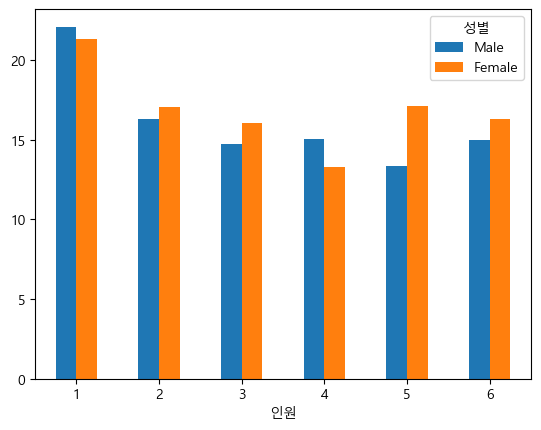

In [85]:
pivot_data.plot.bar(rot=0)